# Анализ датасета character predictions
Импорт библиотек

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import seaborn as sns

Загружам датасет и смотрим размер таблицы

In [187]:
data = pd.read_csv('character-predictions.csv')
data.shape

(1946, 33)

Смотрим первые 10 строк таблицы

In [188]:
data.head(10)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
5,6,1,0,0.021,0.979,Tommen Baratheon,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,1.000000,1
6,7,0,0,0.014,0.986,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,...,NaN,1.0,1,1,26.0,0,0,1,0.431438,0
7,8,0,0,0.036,0.964,Viserys I Targaryen,NaN,1,NaN,NaN,...,1.0,NaN,0,0,NaN,5,1,1,0.678930,0
8,9,0,1,0.724,0.276,Wilbert,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.006689,0
9,10,1,0,0.391,0.609,Wilbert Osgrey,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.020067,1


Строим график распределения количества персонажей в зависимости от их популярности

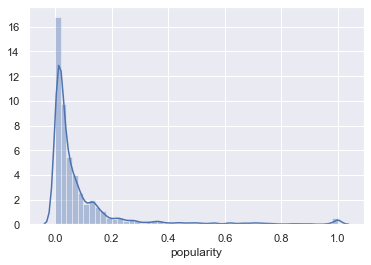

In [189]:
sns.distplot(data['popularity'])

Очищаем датасет, убирая малопопулярных персонажей(популярность<0,2)

In [190]:
data = data.loc[data.popularity >= 0.2]
data.shape

(197, 33)

Размер таблицы уменьшился в 10 раз

Строим график распределения количества персонажей в зависимости от их популярности без малопопулярных персонажей

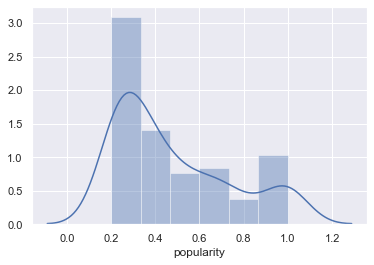

In [191]:
sns.distplot(data['popularity'])

Среди оставшихся персонажей смотрим количество живых и мертвых

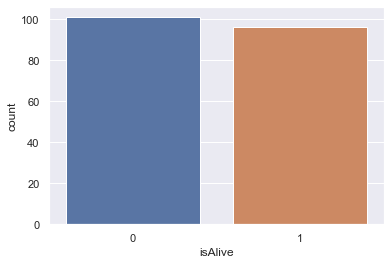

In [192]:
sns.countplot(data['isAlive'])

В игре престолов больше мертвых популярных персонажей, чем живых, но разница небольшая

Строим графики зависимости количества мертвых и живых персонажей в зависимости от популярности

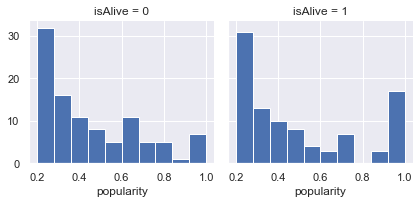

In [193]:
g = sns.FacetGrid(data, col='isAlive')
g.map(plt.hist, 'popularity')

По полученным данным можно сказать, что если персонаж очень популярный, то вероятность выжить у него больше чем умереть

Строим соотношение женатых и неженатых персонажей

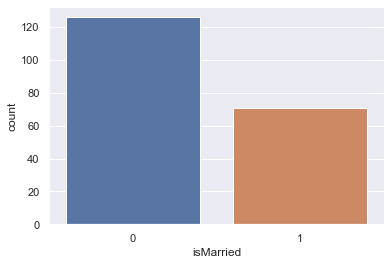

In [194]:
sns.countplot(data['isMarried'])

В игре престолов доля женатых персонажей составляет примерно треть от общего количества

Строим графики зависимости количества женатых и неженатых персонажей в зависимости от популярности

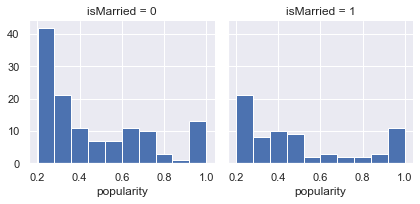

In [195]:
g = sns.FacetGrid(data, col='isMarried')
g.map(plt.hist, 'popularity')

Можно сделать вывод, что непопулярные персонажи реже женаты, чем не женаты

Смотрим соотношение знатных персонажей и не знатных

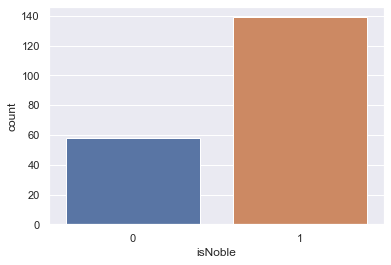

In [196]:
sns.countplot(data['isNoble'])

В игре престолов большая часть персонажей пренадлежит к знатным родам

Смотрим количество персонажей, принадлежащих к каждому народу

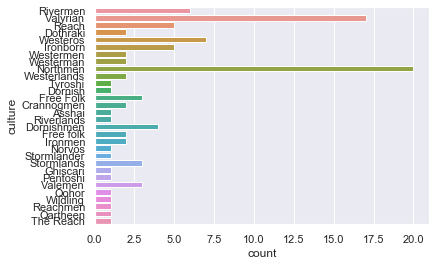

In [197]:
sns.countplot(y=data.culture)

Среди популярных персонажей больше всего северян и жителей Валирии

Строим график соотношения полов

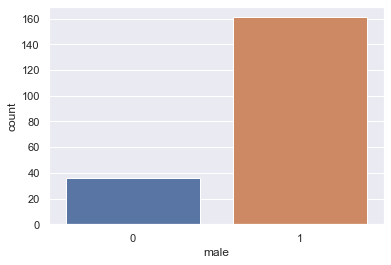

In [198]:
sns.countplot(data['male'])

Мужчин больше чем женщин

Строим модель для предсказания смертности персонажей в зависимости от популярности, пола, происхождения и семейного положения
Используем логистическую регрессию для тренировки модели

In [199]:
model = LogisticRegression(solver='liblinear')
X = data[['popularity', 'male', 'isNoble', 'isMarried']]
y = data.isAlive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Точность совпадения модели с тренировочными данными:

In [200]:
model.score(X_train, y_train)

0.583941605839416

Точность предсказаний модели:

In [201]:
sklearn.metrics.accuracy_score(model.predict(X_test), y_test)

0.55

Так как модель предсказывает не очень хорошо, добавлям в модель малопопулярных персонажей

In [202]:
data = pd.read_csv('character-predictions.csv')
model = LogisticRegression(solver='liblinear')
X = data[['popularity', 'male', 'isNoble', 'isMarried']]
y = data.isAlive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Точность совпадения модели с тренировочными данными:

In [203]:
model.score(X_train, y_train)

0.7334801762114538

Точность предсказаний модели:

In [204]:
sklearn.metrics.accuracy_score(model.predict(X_test), y_test)

0.7791095890410958

Для улучшения модели добавляем в нее народность персонажей. Для этого создаем словарь, в котором даем каждому народу свой численный индекс и заменяем значения в таблице на значения из словаря

In [205]:
cultures = dict(zip(data.culture.unique(),list(range(data.culture.unique().size))))
model = LogisticRegression(solver='liblinear')
X = data[['popularity', 'male', 'isNoble', 'culture', 'isMarried']]
X=X.replace(cultures)
y = data.isAlive
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Точность совпадения модели с тренировочными данными:

In [206]:
model.score(X_train, y_train)

0.7415565345080763

Точность предсказаний модели:

In [207]:
sklearn.metrics.accuracy_score(model.predict(X_test), y_test)

0.738013698630137

Вывод: Джордж Р. Р. не очень предсказуем. Мы можем предсказать убьет ли он персонаже с вероятностью ±75%